In [1]:
!pip install ripser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 635.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 668.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=754681 sha256=8d7aaa8799c5c26754697b53bc69555d8555c83ad644f134ee93d52131daf39f
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=b91ac80feb0e4e67d09047cb1df1401afb008e7b2db49771cd47981d6295a79f
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built ripser hopcroftkarp


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE

# Load the data
file_path = '/content/normalized_output.csv'
data = pd.read_csv(file_path)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(data)

# Creating a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Saving the t-SNE results to a new Excel file
output_file_path = '/content/2D_normalized_output.csv'
tsne_df.to_csv(output_file_path, index=False)

print("t-SNE transformation completed and saved to", output_file_path)


t-SNE transformation completed and saved to /content/2D_normalized_output.csv


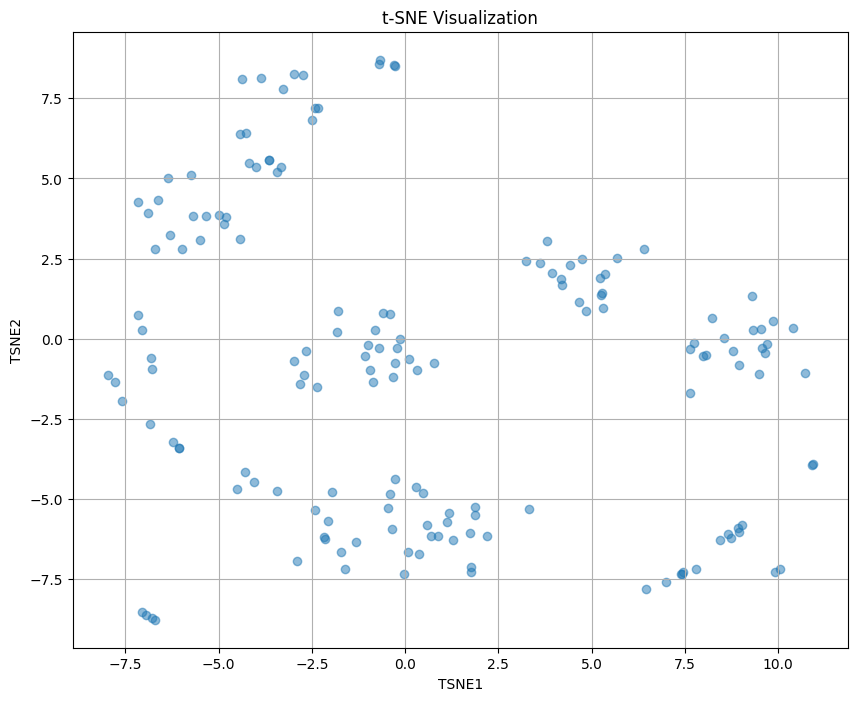

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

output_file_path = '/content/2D_normalized_output.csv'

tsne_data = pd.read_csv(output_file_path)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_data['TSNE1'], tsne_data['TSNE2'], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(True)
plt.show()


In [3]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

def load_data(file_path):

    data = pd.read_csv(file_path)
    return data.values

file_path = '/content/2D_normalized_output.csv'
data_points = load_data(file_path)
def update_radius(radius):
    plt.clf()

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    circles = [plt.Circle((x, y), radius=radius, color='orange', alpha=0.5) for x, y in data_points]
    ax[0].set_title('Growing Disks Around Each Point')
    for circle in circles:
        ax[0].add_patch(circle)
    ax[0].scatter(data_points[:, 0], data_points[:, 1], color='orange')
    ax[0].autoscale()
    ax[0].set_aspect('equal', adjustable='box')

    ax[1].set_title('Persistence Diagram')
    dgms = ripser(data_points, maxdim=0, thresh=radius)['dgms']
    plot_diagrams(dgms, show=False, ax=ax[1])

    plt.tight_layout()
    plt.show()

radius_slider = FloatSlider(min=0.0, max=2.0, step=0.1, value=0.0, description='Radius:', continuous_update=False)

interactive(update_radius, radius=radius_slider)


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Radius:', max=2.0), Output(…

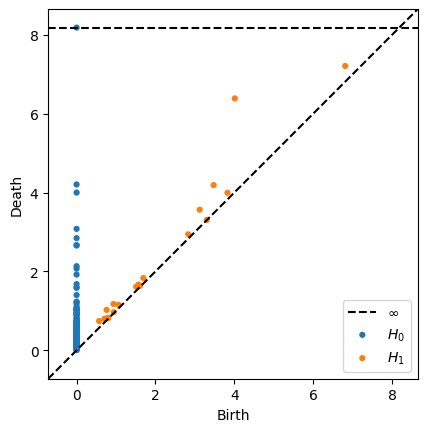

In [ ]:
import pandas as pd
from ripser import ripser
from persim import plot_diagrams

# Load the data from the CSV file
data_path = '/content/2D_normalized_output.csv'  # Replace with the path to your CSV file
data = pd.read_csv(data_path)

point_cloud_data = data.to_numpy()

# Compute the persistent homology using ripser
diagrams = ripser(point_cloud_data)['dgms']

# Plot the persistence diagrams
plot_diagrams(diagrams, show=True)


In [ ]:
!pip install gtda

ERROR: Could not find a version that satisfies the requirement gtda (from versions: none)
ERROR: No matching distribution found for gtda


In [ ]:


from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceLandscape
# Example dataset
data_path = '/content/normalized_output.csv'  # Replace with the path to your CSV file
data = pd.read_csv(data_path)
# Assuming 'data' is your dataset
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])  # 0 for H0, 1 for H1
diagrams = VR.fit_transform(data)

PL = PersistenceLandscape()
landscape = PL.fit_transform(diagrams)

# Now you can plot the persistence landscape
PL.plot(landscape)


ModuleNotFoundError: No module named 'gtda'